# Assignment 5: Derek Pyne

In [18]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline
sns.set_style('ticks')

We start by loading in our data sets into a list of dataframes.

In [2]:
dfs = list(pd.read_excel('Module6_Assignment_DataSet.xlsx', sheetname=None).values())
print('Total of %s datasets' % len(dfs))

Total of 6 datasets


## Part 1
We now want to go over each data set, visually inspect if a linear model is appropriate, and if not, try out multiple transformations. We will define some conveniance functions here to help with these plots and exploring different transformations.

In [3]:
def linearRegressionAndResiduals(df, 
                                 x_transform_function=None, y_transform_function=None, 
                                 x_col='x', y_col='y', fit_intercept=True):
    x_transform = df[x_col].apply(x_transform_function) if x_transform_function else df[x_col]
    y_transform = df[y_col].apply(y_transform_function) if y_transform_function else df[y_col]
    if fit_intercept:
        result = sm.OLS(y_transform, sm.add_constant(x_transform)).fit()
    else:
        result = sm.OLS(y_transform, x_transform).fit()
    print(result.summary())
    fig, axs = plt.subplots(nrows=2)
    axs[0].plot(x_transform, y_transform, '.')
    axs[0].plot(x_transform, result.predict(), '-')
    x_name = x_col + '_' + x_transform_function.__name__ if x_transform_function else x_col
    y_name = y_col + '_' + y_transform_function.__name__ if y_transform_function else y_col
    axs[0].set_xlabel(x_name)
    axs[0].set_ylabel(y_name)
    axs[0].set_title('Data and linear fit')
    
    axs[1].plot(x_transform, y_transform - result.predict(), '.')
    axs[1].set_title('Residuals')
    fig.tight_layout()

In [4]:
def identity(x): return x;
def transformAndPlot(df, transforms, x_col='x', y_col='y'):
    fig, axs = plt.subplots(len(transforms), len(transforms), figsize=(17, 17))
    results = {}
    for ax, transform_pair in zip(axs.flatten(), itertools.product(transforms, transforms)):
        x_transform = df[x_col].apply(transform_pair[0])
        y_transform = df[y_col].apply(transform_pair[1])
        x_name = x_col + '_' + transform_pair[0].__name__
        y_name = y_col + '_' + transform_pair[1].__name__
        
        result = sm.OLS(y_transform, sm.add_constant(x_transform)).fit()
        result_text = 'Slope: %.2e\nIntercept: %.2e\nAdj-R2: %.2f' % (result.params['x'], 
                                                                      result.params['const'], 
                                                                      result.rsquared_adj)
        
        results[x_name + ':' + y_name] = result
        ax.plot(x_transform, y_transform, '.')
        ax.plot(x_transform, result.predict(), '-')
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.text(0.03, 0.82, result_text, transform=ax.transAxes)
    fig.tight_layout()
    return results

## Data Set 1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           4.47e-84
Time:                        18:04:10   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.469      0.508      0.6

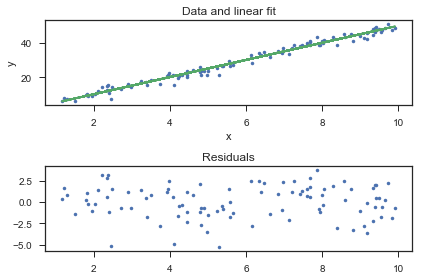

In [5]:
linearRegressionAndResiduals(dfs[0])

We can see that our linear regression is a good fit to the data here. There is a strong linear trend, the errors have a nearly normal distribution, and the variance is approximately constant across `x`.

We also see a nearly zero intercept of 0.2381 and a slope of 4.9843. The p value for our intercepts suggests that we may be able to fit this data using only a slope.

We see no outliers in the data.

## Data Set 2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           6.11e-19
Time:                        18:04:11   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0956      2.547      0.430      0.6

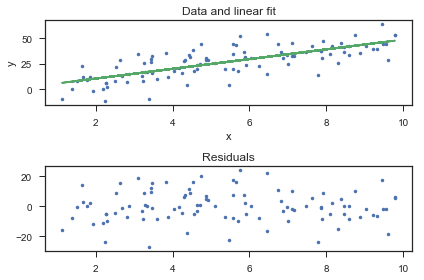

In [6]:
linearRegressionAndResiduals(dfs[1])

We can see that our linear regression is a good fit to the data here. There is a strong linear trend, the errors have a nearly normal distribution, and the variance is approximately constant across `x`. Overall, there is higher variance and higher residuals in this dataset then our first dataset. However, the trend still matches our linear conditions so the fit is still appropriate.

We also see a nearly zero intercept of 1.0956 and a slope of 4.7774. The p value for our intercepts suggests that we may be able to fit this data using only a slope.

We see no outliers in the data.

## Data Set 3

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           1.04e-31
Time:                        18:04:11   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2636.1748    402.741     -6.546      0.0

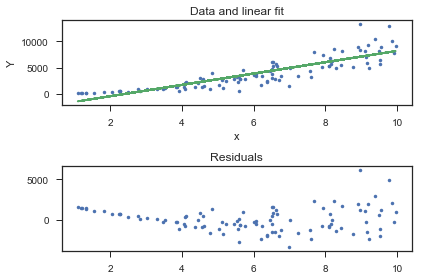

In [7]:
linearRegressionAndResiduals(dfs[2], y_col='Y')

We see here that although the data appear to have some linear trend, the residuals are not normally distributed and the variance is not constant. Lets try some transformations.

/Users/dpyne/anaconda/envs/helpful-analytics/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1366: RuntimeWarning: invalid value encountered in subtract
  weights=weights))**2)


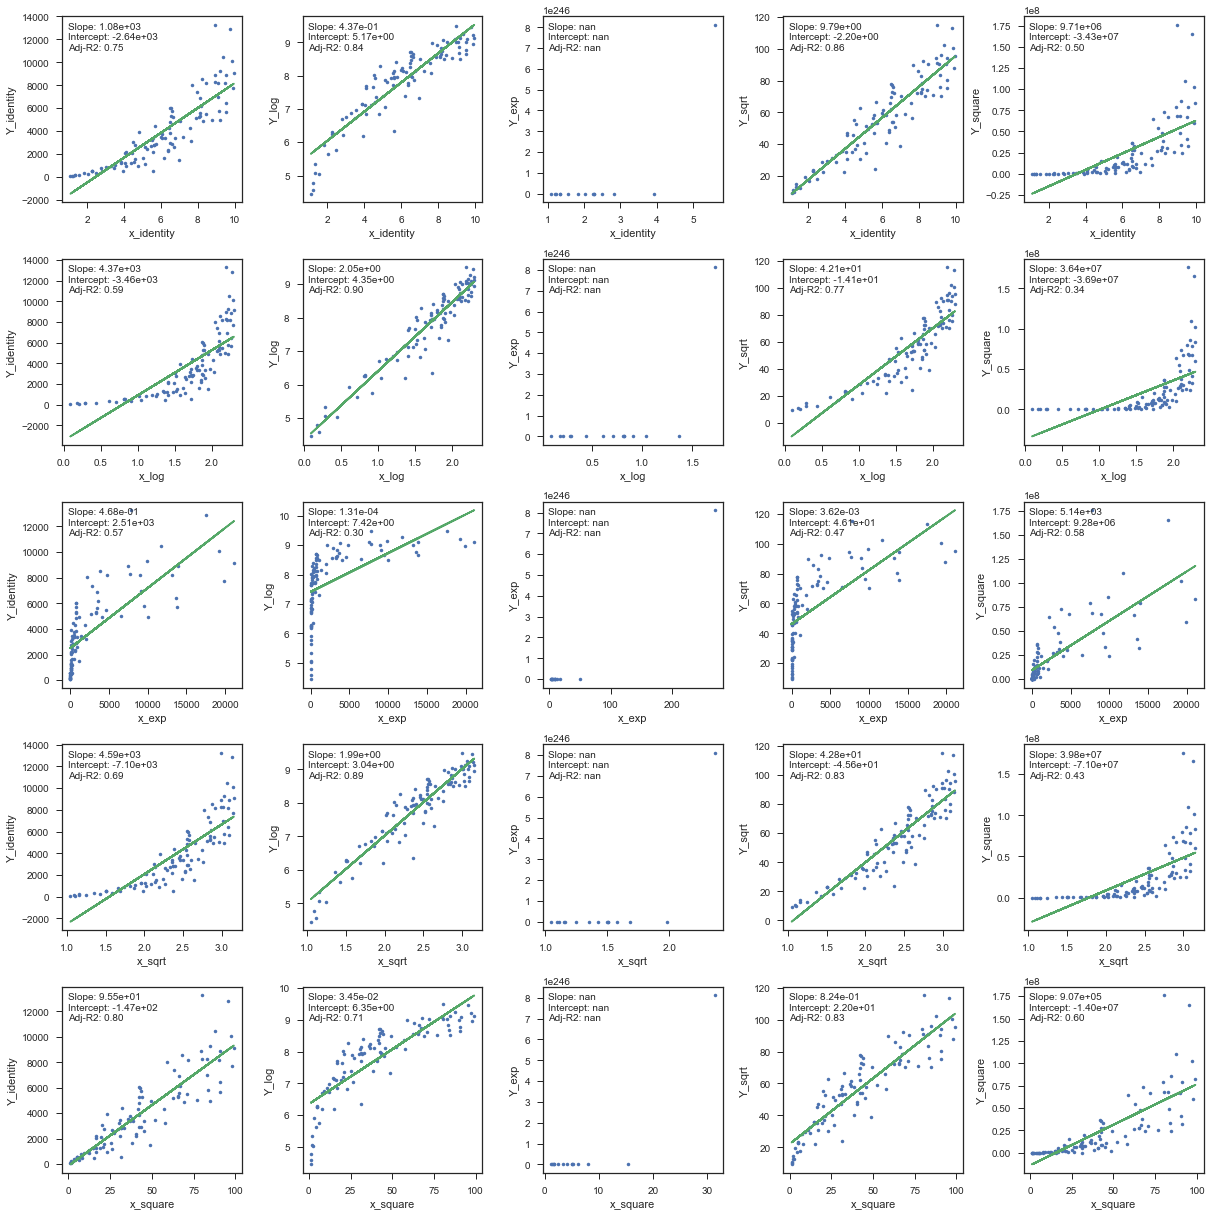

In [8]:
results = transformAndPlot(dfs[2], [identity, np.log, np.exp, np.sqrt, np.square], y_col='Y')

The log-log plot seems to be the best fit, let's look at the fit in particular.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     904.8
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           2.74e-51
Time:                        18:04:19   Log-Likelihood:                -40.302
No. Observations:                 100   AIC:                             84.60
Df Residuals:                      98   BIC:                             89.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3508      0.120     36.221      0.0

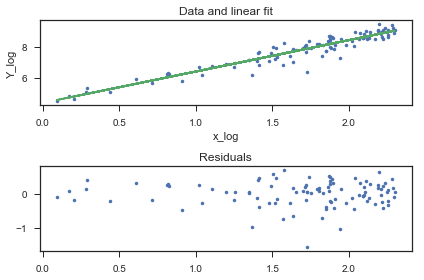

In [9]:
linearRegressionAndResiduals(dfs[2], y_col='Y', x_transform_function=np.log, y_transform_function=np.log)

We can see that our transformed data is a good fit to the linear regression. There is a strong linear trend, the errors have a nearly normal distribution, and the variance is approximately constant across `x_log`.

We see no outliers in the data.

We also see an intercept of 4.3508 and a slope of 2.0535. This gives us a relation as follows:

$$\log(y) = b + m \log(x)$$
$$y = e^{b+m\log(x)} = e^b + x^m = 3.0 + x^{2.0535}$$

This means we have an approximately square relationship to x

## Data Set 4

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           8.87e-12
Time:                        18:04:20   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.535e+05    2.1e+05     -3.585      0.0

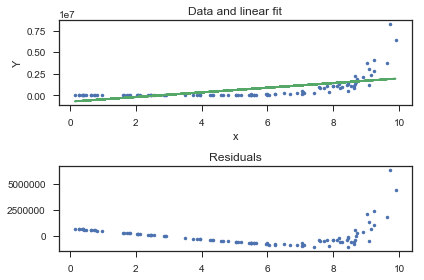

In [10]:
linearRegressionAndResiduals(dfs[3], y_col='Y')

This data seems strongly nonlinear. Let's try some transforms.

/Users/dpyne/anaconda/envs/helpful-analytics/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1366: RuntimeWarning: invalid value encountered in subtract
  weights=weights))**2)


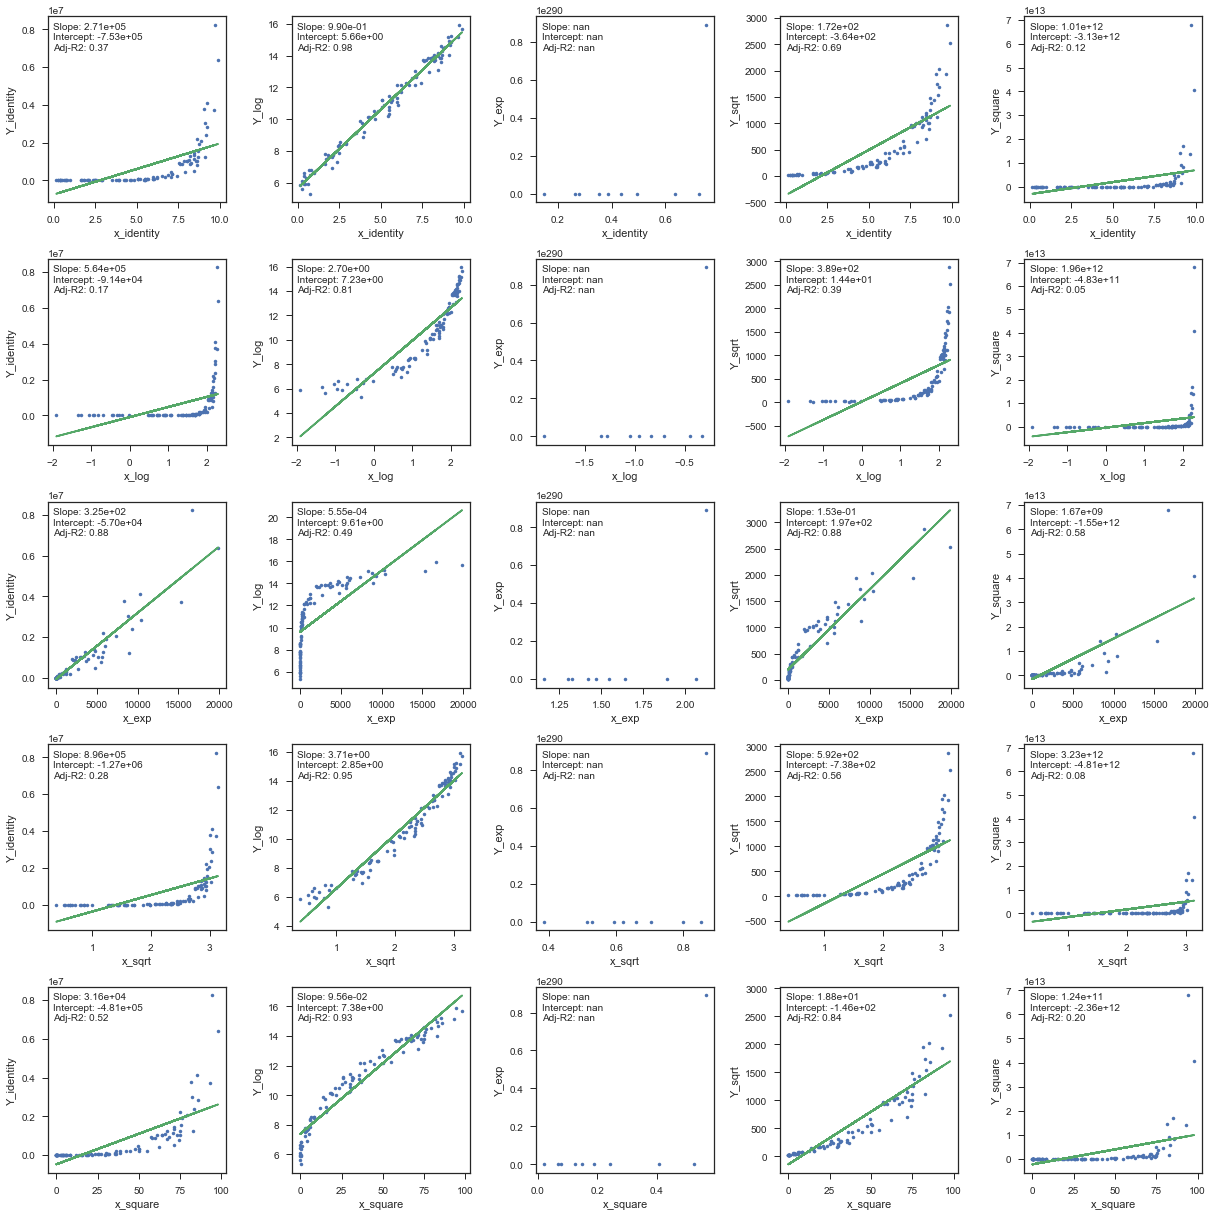

In [11]:
results = transformAndPlot(dfs[3], [identity, np.log, np.exp, np.sqrt, np.square], y_col='Y')

The log-identity plot seems to be the best fit, let's look at the fit in particular.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           6.91e-89
Time:                        18:04:28   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6647      0.078     72.264      0.0

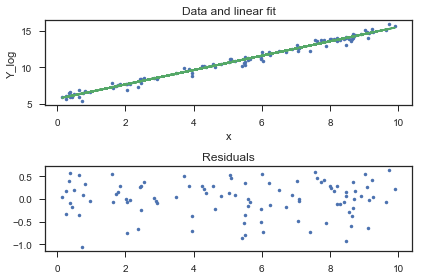

In [12]:
linearRegressionAndResiduals(dfs[3], y_col='Y', y_transform_function=np.log)

We can see that our transformed data is a good fit to the linear regression. There is a strong linear trend, the errors have a nearly normal distribution, and the variance is approximately constant across `x`.

We see no outliers in the data.

We also see an intercept of 5.6647 and a slope of 0.9898. This gives us a relation as follows:

$$\log(y) = b + m x$$
$$y = e^{b+m(x)} = e^b e^{mx} = 288 e^{0.9898 x}$$

This means we have an approximately exponential relationship.

## Data Set 5

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           4.70e-37
Time:                        18:04:29   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9213      1.346      0.685      0.4

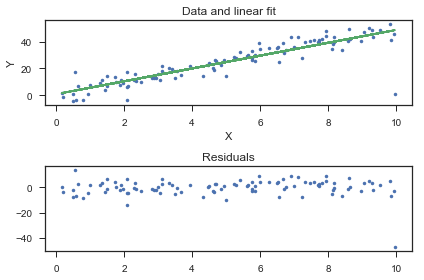

In [13]:
linearRegressionAndResiduals(dfs[4], x_col='X', y_col='Y')

We can see that our linear regression is a good fit to the data here. There is a strong linear trend, the errors have a nearly normal distribution, and the variance is approximately constant across `x`.

We also see a nearly zero intercept of 0.9213 and a slope of 4.7671. The p value for our intercepts suggests that we may be able to fit this data using only a slope.

We see a single outlier in our plot around x of 10 and y of about 0. Let's remove this point and see how it affects our fit.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           3.84e-52
Time:                        18:04:30   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0993      0.935     -0.106      0.9

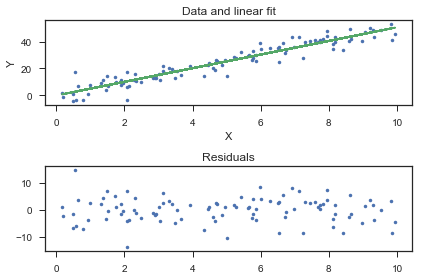

In [14]:
linearRegressionAndResiduals(dfs[4][(dfs[4]['X'] < 9) | (dfs[4]['Y'] > 10)], x_col='X', y_col='Y')

We see a similar strong linear fit excpet our intercept has now changed to -0.0993 with lower significance and our slope has risen to 5.0705.

## Data Set 6

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           2.49e-54
Time:                        18:04:31   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3059      1.534     -0.199      0.8

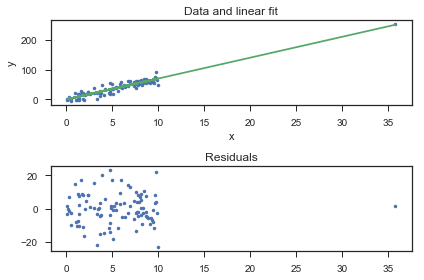

In [15]:
linearRegressionAndResiduals(dfs[5])

We can see that our linear regression is a good fit to the data here. There is a strong linear trend, the errors have a nearly normal distribution, and the variance is approximately constant across `x`.

We also see a nearly zero intercept of -0.3059 and a slope of 7.0272. The p value for our intercepts suggests that we may be able to fit this data using only a slope.

However, we see a strong colinear outlier. Let's remove this from our data and see how it affects our fit.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           2.29e-40
Time:                        18:04:31   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0203      1.899     -0.011      0.9

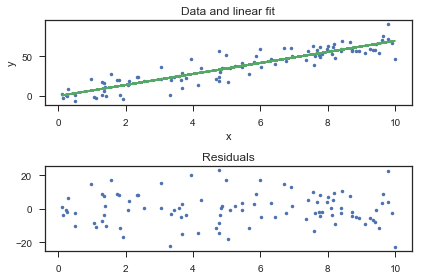

In [16]:
linearRegressionAndResiduals(dfs[5][dfs[5]['x'] < 15])

We still see a strong linear relationship with marginal changes in the fitting parameters.

## Part 2:
Force the model from the second data set to have a zero intercept. What do you see regarding R-square and the significance of the slopes? 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     782.6
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           8.34e-49
Time:                        18:04:32   Log-Likelihood:                -375.83
No. Observations:                 100   AIC:                             753.7
Df Residuals:                      99   BIC:                             756.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              4.9467      0.177     27.975      0.0

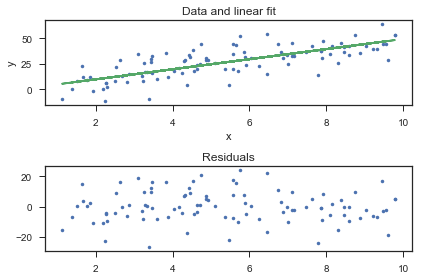

In [17]:
linearRegressionAndResiduals(dfs[1], fit_intercept=False)

We see that forcing the intercept to zero the R-squared rose to 0.89 from 0.55 and the t-value rose to 27.9. 

Since the model without the intercept is able to capture the dynamics of our data, we prefer it because it is simplier. Although these our only linear models, any simplification will make it easier for us to generate hypotheses of what these model means for the real system the data is coming from.